In [2]:
##Pseudo Code for Analysis
# Import pandas and pathlib
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#Read in APIs

In [4]:
#Read CSVs

In [5]:
#All Dates are by year

In [6]:
#Pct change by Zip
#Price Per Square foot by Zip
    #"Date" "Zip" "Price Per Square foot"
#Schools
    #"Date" "Zip" "School District" "Grade"
#Crime
    #"Date" "Zip" "Type" 
#Income Tax
    #"Date" "Zip" "Income Tax Paid" "Number of returns" Total Charitable Contributions" "Brackets"
#Real Estate Tax
    #"Date" "Zip" "Real Estate taxes paid" "personal property tax"
#Opportunity Zones
    #"Zip"
#Stray Animals
    #"Date" "Zip" "Number of Strays Reported"
#Population
    #"Date" "Zip" "Number of People"
#Construction Permits
    #"Date" "Zip" "Type (Residential vs Commercial)"
#Restaurant, Bars, & Clubs

In [7]:
# Construction Permits Correlation to pct_chg
def correlate_construction_permits(permits_df, pct_chg_df, groupby_month=True):
    # input: permits_df with date, zip, permit_count, permit_type (permit_type: Residential vs Commercial)
    # input: pct_chg_df with date, zip, pct_change
    # return dataframe with zip, correlation (correlation of number of permits to pct change by zip code)
    
    # set 'date' column type to date with year+month or with only year format (for easier groupby date, later)
    if groupby_month == True:
        
        # set 'date' column type to date with year+month only format
        permits_df['date'] = pd.to_datetime(permits_df['date'], format= '%Y%m')
        pct_chg_df['date'] = pd.to_datetime(pct_chg_df['date'], format= '%Y%m')
        
    elif groupby_month == False:
        
        # set 'date' column type to date with year only format
        permits_df['date'] = pd.to_datetime(permits_df['date'], format= '%Y', exact=False)
        pct_chg_df['date'] = pd.to_datetime(pct_chg_df['date'], format= '%Y', exact=False)

    
    #  for permits_df and pct_chg_df, groupby zip and date then calculate sum of each zip/date grouping
    permits_by_zipdate = permits_df.groupby(['zip','date']).sum()
    pct_chg_by_zipdate = pct_chg.groupby(['zip','date']).sum()
    
#     # TESTING ONLY: spot check data
#     print(permits_by_zipdate)
    
    #  combine permits_by_zipdate and pct_chg_by_zipdate by matching indexes
    combined_permits_pct_chg_df = pd.concat([permits_by_zipdate, pct_chg_by_zipdate], axis="columns", join="inner")

    # drop any null data rows
    combined_permits_pct_chg_df.dropna(inplace=True)
    
    
    # Set column names for use in initializing correlation_per_zip dataframe, for appending rows, and for resetting index
    cols = ['zip','permit_correlation']

    #initialize correlation_per_zip dataframe with cols
    correlation_per_zip_df = pd.DataFrame(columns=cols)

    # iterate through each zip
    for zip, df in combined_permits_pct_chg_df.groupby(level=0):

        # calculate correlation of this zip's permit count to pct_chg
        correlation_df = df.corr()

        # record specific correlation value from correlation dataframe
        correlation_value = correlation_df.loc['permit_count']['pct_chg']

        # create row/series based on this zip's correlation to append to  dataframe
        correlation_row = [{cols[0] : zip, cols[1] : correlation_value}]

        # append row to dataframe
        correlation_per_zip_df = correlation_per_zip_df.append(correlation_row)

    # reset  dataframe index to zip/cols[0]
    correlation_per_zip_df.set_index(cols[0], inplace=True)
 
    return correlation_per_zip_df  # return correlation_per_zip_df with columns: 'zip', 'permit_correlation'
    # return correlation_per_zip_df, permits_by_zipdate, pct_chg_by_zipdate

In [8]:
# Read in the pct_change data
pct_chg_data = Path("../resources/dan/sample_pct_chg_dan.csv")
pct_chg = pd.read_csv(pct_chg_data, sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '..\\resources\\dan\\sample_pct_chg_dan.csv'

In [9]:
# Read in the construction permits data
permits_data = Path("../resources/dan/sample_permits_dan.csv")
permits = pd.read_csv(permits_data, sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '..\\resources\\dan\\sample_permits_dan.csv'

In [10]:
# Test permits to pct_chg correlation
permit_test_df = None
permit_test_df = correlate_construction_permits(permits, pct_chg, groupby_month=True)

NameError: name 'permits' is not defined

In [11]:
# Print out test results for permits/pct_chg
permit_test_df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [12]:
# Put the target (housing value -- MEDV) in another DataFrame
#ROI = pd.DataFrame(pct_chg.target, columns=["pct_change"])

# define the data/predictors as the pre-set feature names  
# ind_var_1 = pd.DataFrame(data.data, columns=data.feature_names)

In [13]:
## Without a constant

#X = ind_var_1["permit_count"]
#y = ROI["pct_change"]

# Note the difference in argument order
#model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
#model.summary()

In [14]:
combined_data = pd.concat([permits, pct_chg], axis="columns", join="inner").sort_index()
combined_data.dropna(inplace=True)
combined_data.head()

NameError: name 'permits' is not defined

In [15]:
#combined_dts = pd.to_datetime(combined_data['zip'])
#combined_dti = pd.DatetimeIndex(combined_dts.values)
#combined_df_time_index = combined_data.set_index(sp500_dti)
#combined_df_time_index.drop('zip',axis=1,inplace=True)
#combined_df_time_index.sort_index().head()

In [16]:
combined_data.drop('zip',axis=1)

NameError: name 'combined_data' is not defined

In [17]:
csvpath = Path("../Resources/Jack/Texas_Pricing_Data.csv")

In [18]:
pricing_data_df = pd.read_csv(csvpath)

In [19]:
pricing_data_df.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio
0,202006,77414,"bay city, tx",202549.5,130,105.5,40,0,16,31,113.793981,1700.0,232176,161,0.2385
1,202006,77087,"houston, tx",205050.0,21,80.5,4,0,4,19,124.456393,1615.0,227396,40,0.9048
2,202006,77024,"houston, tx",1249550.0,396,73.5,108,0,92,77,302.330691,3815.0,1759357,473,0.1944
3,202006,77020,"houston, tx",292500.0,66,72.5,28,4,16,32,167.322558,1666.0,273267,98,0.4848
4,202006,77983,"seadrift, tx",255050.0,22,136.5,0,0,4,9,153.846154,1746.0,288390,31,0.4091


In [20]:
pricing_data_df.set_index(pd.to_datetime(pricing_data_df['month_date_yyyymm'], format='%Y%m', infer_datetime_format=True), inplace=True)
pricing_data_df.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio
month_date_yyyymm,,,,,,,,,,,,,,,
2020-06-01,202006,77414,"bay city, tx",202549.5,130,105.5,40,0,16,31,113.793981,1700.0,232176,161,0.2385
2020-06-01,202006,77087,"houston, tx",205050.0,21,80.5,4,0,4,19,124.456393,1615.0,227396,40,0.9048
2020-06-01,202006,77024,"houston, tx",1249550.0,396,73.5,108,0,92,77,302.330691,3815.0,1759357,473,0.1944
2020-06-01,202006,77020,"houston, tx",292500.0,66,72.5,28,4,16,32,167.322558,1666.0,273267,98,0.4848
2020-06-01,202006,77983,"seadrift, tx",255050.0,22,136.5,0,0,4,9,153.846154,1746.0,288390,31,0.4091


In [21]:
pricing_data_df.drop('month_date_yyyymm',axis=1,inplace=True)
pricing_data_df.head()

,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio
month_date_yyyymm,,,,,,,,,,,,,,
2020-06-01,77414,"bay city, tx",202549.5,130,105.5,40,0,16,31,113.793981,1700.0,232176,161,0.2385
2020-06-01,77087,"houston, tx",205050.0,21,80.5,4,0,4,19,124.456393,1615.0,227396,40,0.9048
2020-06-01,77024,"houston, tx",1249550.0,396,73.5,108,0,92,77,302.330691,3815.0,1759357,473,0.1944
2020-06-01,77020,"houston, tx",292500.0,66,72.5,28,4,16,32,167.322558,1666.0,273267,98,0.4848
2020-06-01,77983,"seadrift, tx",255050.0,22,136.5,0,0,4,9,153.846154,1746.0,288390,31,0.4091


In [22]:
pricing_data_df.sort_values(by=['postal_code','month_date_yyyymm'], inplace=True)
pricing_data_df.head()

,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio
month_date_yyyymm,,,,,,,,,,,,,,
2016-07-01,77002,"houston, tx",312050.0,52,88.0,12,0,8,15,253.271422,1266.0,499723,67,0.2885
2016-08-01,77002,"houston, tx",349050.0,54,89.5,12,0,12,20,250.615461,1365.5,505122,74,0.3704
2016-09-01,77002,"houston, tx",339050.0,57,76.5,12,0,8,12,248.215391,1375.5,476139,69,0.2105
2016-10-01,77002,"houston, tx",326050.0,55,80.0,8,0,4,8,241.769547,1338.0,439559,63,0.1455
2016-11-01,77002,"houston, tx",329050.0,53,83.0,16,0,4,8,245.061046,1276.5,425851,61,0.1509


In [23]:
pricing_data_df['pct_price_change'] = pricing_data_df['median_listing_price'].pct_change()
pricing_data_df.head()

,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change
month_date_yyyymm,,,,,,,,,,,,,,,
2016-07-01,77002,"houston, tx",312050.0,52,88.0,12,0,8,15,253.271422,1266.0,499723,67,0.2885,NaN
2016-08-01,77002,"houston, tx",349050.0,54,89.5,12,0,12,20,250.615461,1365.5,505122,74,0.3704,0.118571
2016-09-01,77002,"houston, tx",339050.0,57,76.5,12,0,8,12,248.215391,1375.5,476139,69,0.2105,-0.028649
2016-10-01,77002,"houston, tx",326050.0,55,80.0,8,0,4,8,241.769547,1338.0,439559,63,0.1455,-0.038342
2016-11-01,77002,"houston, tx",329050.0,53,83.0,16,0,4,8,245.061046,1276.5,425851,61,0.1509,0.009201


In [24]:
pricing_data_df['pct_price_change'] = pricing_data_df['median_listing_price'].pct_change()
pricing_data_df

,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change
month_date_yyyymm,,,,,,,,,,,,,,,
2016-07-01,77002,"houston, tx",312050.0,52,88.0,12,0,8,15,253.271422,1266.0,499723,67,0.2885,NaN
2016-08-01,77002,"houston, tx",349050.0,54,89.5,12,0,12,20,250.615461,1365.5,505122,74,0.3704,0.118571
2016-09-01,77002,"houston, tx",339050.0,57,76.5,12,0,8,12,248.215391,1375.5,476139,69,0.2105,-0.028649
2016-10-01,77002,"houston, tx",326050.0,55,80.0,8,0,4,8,241.769547,1338.0,439559,63,0.1455,-0.038342
2016-11-01,77002,"houston, tx",329050.0,53,83.0,16,0,4,8,245.061046,1276.5,425851,61,0.1509,0.009201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,77995,"yoakum, tx",209850.0,29,133.0,8,0,4,9,100.147275,2103.0,342624,38,0.3103,0.049512
2020-03-01,77995,"yoakum, tx",202400.0,29,142.0,0,0,0,11,91.252346,2050.0,326075,40,0.3793,-0.035502
2020-04-01,77995,"yoakum, tx",194500.0,31,105.0,8,0,0,4,99.498926,1917.0,295784,35,0.1290,-0.039032


In [25]:
pricing_data_df['pct_price_sqft_change'] = pricing_data_df['median_listing_price_per_square_feet'].pct_change()
pricing_data_df

,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change,pct_price_sqft_change
month_date_yyyymm,,,,,,,,,,,,,,,,
2016-07-01,77002,"houston, tx",312050.0,52,88.0,12,0,8,15,253.271422,1266.0,499723,67,0.2885,NaN,NaN
2016-08-01,77002,"houston, tx",349050.0,54,89.5,12,0,12,20,250.615461,1365.5,505122,74,0.3704,0.118571,-0.010487
2016-09-01,77002,"houston, tx",339050.0,57,76.5,12,0,8,12,248.215391,1375.5,476139,69,0.2105,-0.028649,-0.009577
2016-10-01,77002,"houston, tx",326050.0,55,80.0,8,0,4,8,241.769547,1338.0,439559,63,0.1455,-0.038342,-0.025969
2016-11-01,77002,"houston, tx",329050.0,53,83.0,16,0,4,8,245.061046,1276.5,425851,61,0.1509,0.009201,0.013614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,77995,"yoakum, tx",209850.0,29,133.0,8,0,4,9,100.147275,2103.0,342624,38,0.3103,0.049512,0.033128
2020-03-01,77995,"yoakum, tx",202400.0,29,142.0,0,0,0,11,91.252346,2050.0,326075,40,0.3793,-0.035502,-0.088818
2020-04-01,77995,"yoakum, tx",194500.0,31,105.0,8,0,0,4,99.498926,1917.0,295784,35,0.1290,-0.039032,0.090371


In [26]:
pricing_data_df.dropna(inplace=True)

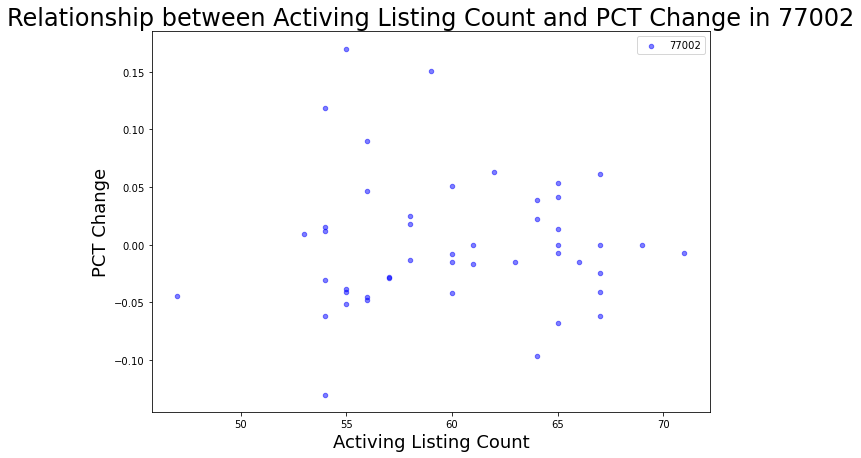

In [27]:
ax1 = pricing_data_df[pricing_data_df['postal_code'] == 77002].plot(kind='scatter', x='active_listing_count', y='pct_price_change', color='blue', alpha=0.5, figsize=(10, 7))
plt.legend(labels=[77002])
plt.title('Relationship between Activing Listing Count and PCT Change in 77002', size=24)
plt.xlabel('Activing Listing Count', size=18)
plt.ylabel('PCT Change', size=18);

In [28]:
df_zip = pricing_data_df[pricing_data_df['postal_code'] == 77002]

In [29]:
zip_fit = np.polyfit(df_zip.active_listing_count, df_zip.pct_price_change, 1)

In [30]:
zip_fit

array([ 2.47140559e-05, -9.47081885e-04])

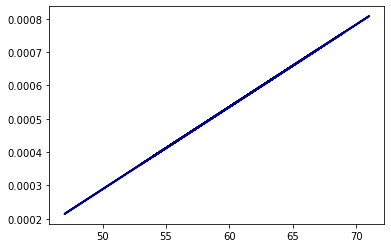

In [31]:
plt.plot(df_zip.active_listing_count, zip_fit[0] * df_zip.active_listing_count + zip_fit[1], color='darkblue', linewidth=2)

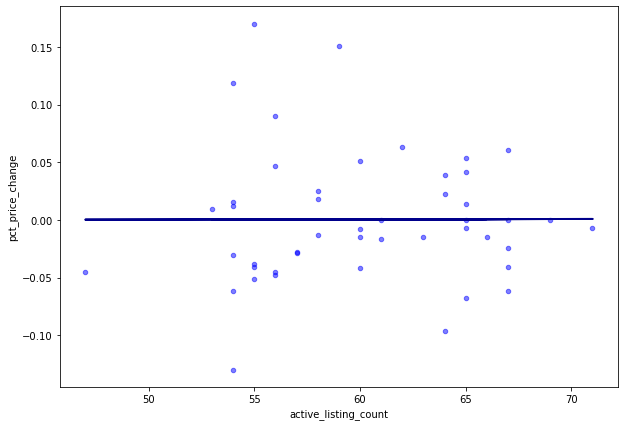

In [32]:
ax1 = df_zip.plot(kind= 'scatter', x = 'active_listing_count',y='pct_price_change', color='blue', alpha=0.5, figsize=(10,7))
plt.plot(df_zip.active_listing_count, zip_fit[0] * df_zip.active_listing_count + zip_fit[1], color='darkblue', linewidth=2);

In [33]:
df_zip.head()

,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change,pct_price_sqft_change
month_date_yyyymm,,,,,,,,,,,,,,,,
2016-08-01,77002,"houston, tx",349050.0,54,89.5,12,0,12,20,250.615461,1365.5,505122,74,0.3704,0.118571,-0.010487
2016-09-01,77002,"houston, tx",339050.0,57,76.5,12,0,8,12,248.215391,1375.5,476139,69,0.2105,-0.028649,-0.009577
2016-10-01,77002,"houston, tx",326050.0,55,80.0,8,0,4,8,241.769547,1338.0,439559,63,0.1455,-0.038342,-0.025969
2016-11-01,77002,"houston, tx",329050.0,53,83.0,16,0,4,8,245.061046,1276.5,425851,61,0.1509,0.009201,0.013614
2016-12-01,77002,"houston, tx",385050.0,55,56.0,8,0,4,8,278.662420,1178.0,414624,63,0.1455,0.170187,0.137114


In [34]:
lr_zip = LinearRegression()

In [35]:
lr_zip.fit(df_zip[['active_listing_count']], df_zip['pct_price_change'])

LinearRegression()

In [36]:
print(lr_zip.intercept_)

-0.0009470818845248921


In [37]:
print(lr_zip.coef_)

[2.47140559e-05]


In [38]:
print(np.polyval(zip_fit,[70]))

[0.0007829]


In [39]:
print(lr_zip.predict([[70]]))

[0.0007829]


In [40]:
mlr_zip = LinearRegression()

In [41]:
mlr_zip.fit(df_zip[['median_listing_price','new_listing_count']], df_zip['pct_price_change'])

LinearRegression()

In [42]:
print(mlr_zip.intercept_)

-0.42176243992237106


In [43]:
print(mlr_zip.coef_)

[ 1.39225365e-06 -2.31291179e-03]


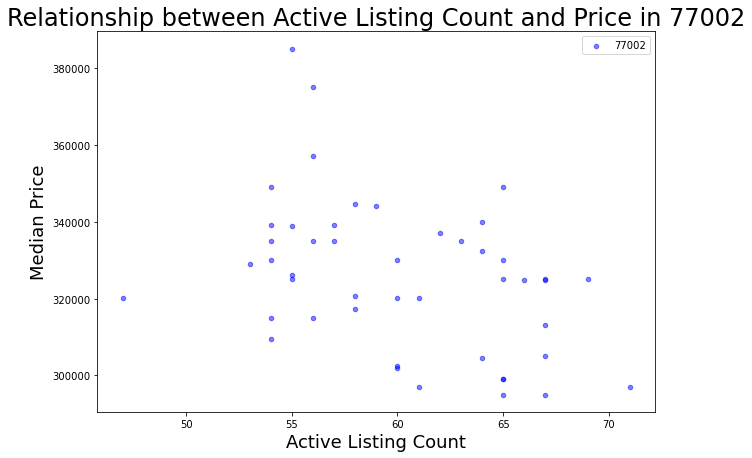

In [44]:
ax1 = pricing_data_df[pricing_data_df['postal_code'] == 77002].plot(kind='scatter', x='active_listing_count', y='median_listing_price', color='blue', alpha=0.5, figsize=(10, 7))
plt.legend(labels=[77002])
plt.title('Relationship between Active Listing Count and Price in 77002', size=24)
plt.xlabel('Active Listing Count', size=18)
plt.ylabel('Median Price', size=18);

In [64]:
df_zip2 = pricing_data_df[pricing_data_df['postal_code'] == 77002]

In [65]:
#zip_fit2 = np.polyfit(df_zip2.active_listing_count, df_zip2.median_listing_price, 1)
zip_fit2 = np.polyfit(df_zip2.median_listing_price, df_zip2.active_listing_count, 1)

In [66]:
zip_fit3 = np.polyfit(df_zip2.median_listing_price, df_zip2.active_listing_count, 1)

In [67]:
zip_fit2

array([-1.07751157e-04,  9.52119203e+01])

In [68]:
zip_fit3

array([-1.07751157e-04,  9.52119203e+01])

In [69]:
lr_zip3 = LinearRegression()

In [73]:
lr_zip3.fit(df_zip2[['active_listing_count']], df_zip['median_listing_price'])

LinearRegression()

In [71]:
print(lr_zip3.intercept_)

412910.7553724498


In [72]:
print(lr_zip3.coef_)

[-1449.24381887]


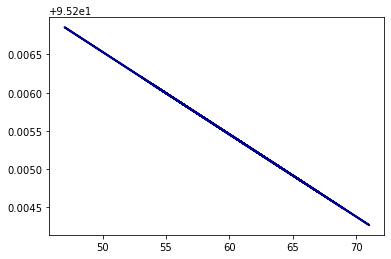

In [54]:
plt.plot(df_zip2.active_listing_count, zip_fit2[0] * df_zip2.active_listing_count + zip_fit2[1], color='darkblue', linewidth=2)
#plt.plot(df_zip2.median_listing_price, zip_fit2[0] * df_zip2.median_listing_price + zip_fit2[1], color='darkblue', linewidth=2)

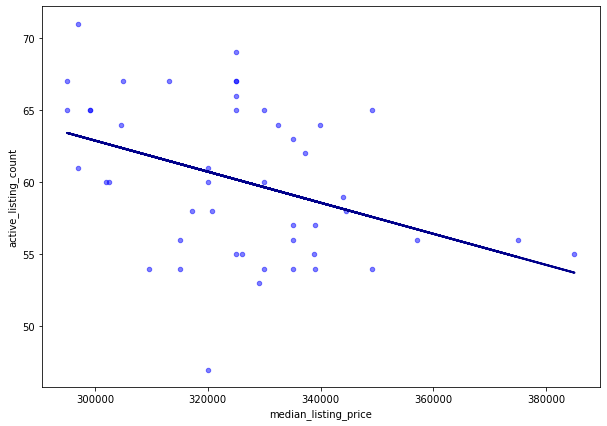

In [55]:
#ax1 = df_zip2.plot(kind= 'scatter', x = 'active_listing_count',y='median_listing_price', color='blue', alpha=0.5, figsize=(10,7))
#plt.plot(df_zip2.active_listing_count, zip_fit2[0] * df_zip2.active_listing_count + zip_fit2[1], color='darkblue', linewidth=2);
ax1 = df_zip2.plot(kind= 'scatter', x = 'median_listing_price',y='active_listing_count', color='blue', alpha=0.5, figsize=(10,7))
plt.plot(df_zip2.median_listing_price, zip_fit2[0] * df_zip2.median_listing_price + zip_fit2[1], color='darkblue', linewidth=2);

In [56]:
pricing_data_df[pricing_data_df['postal_code'] == 77002].corr()

,postal_code,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change,pct_price_sqft_change
postal_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_listing_price,NaN,1.000000,-0.395168,0.090075,-0.233233,NaN,-0.410128,-0.256630,0.626276,0.079398,0.566748,-0.369728,-0.188540,0.519816,0.225269
active_listing_count,NaN,-0.395168,1.000000,-0.291959,0.129695,NaN,0.420076,0.449821,-0.205584,-0.234881,-0.308512,0.802185,0.277760,0.002300,0.046096
median_days_on_market,NaN,0.090075,-0.291959,1.000000,-0.418634,NaN,-0.076647,-0.274435,-0.056295,0.148042,0.217186,-0.329875,-0.217777,0.179563,0.035642
new_listing_count,NaN,-0.233233,0.129695,-0.418634,1.000000,NaN,0.027831,0.177069,-0.014045,-0.186464,-0.300590,0.183413,0.149583,-0.301786,0.034071
price_increased_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_reduced_count,NaN,-0.410128,0.420076,-0.076647,0.027831,NaN,1.000000,0.451407,-0.381076,0.024883,-0.176026,0.512433,0.409451,-0.040305,-0.164427
pending_listing_count,NaN,-0.256630,0.449821,-0.274435,0.177069,NaN,0.451407,1.000000,-0.441267,0.350732,0.039888,0.894099,0.980089,0.018174,-0.038604
median_listing_price_per_square_feet,NaN,0.626276,-0.205584,-0.056295,-0.014045,NaN,-0.381076,-0.441267,1.000000,-0.449620,0.187275,-0.398093,-0.426409,0.362514,0.497443
median_square_feet,NaN,0.079398,-0.234881,0.148042,-0.186464,NaN,0.024883,0.350732,-0.449620,1.000000,0.576140,0.116690,0.445544,0.164392,-0.112701


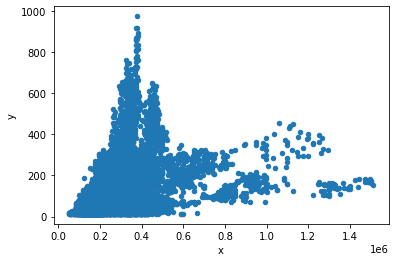

In [57]:
pd.DataFrame({
    'x' : pricing_data_df['median_listing_price'], 'y' : pricing_data_df['active_listing_count']
}).plot(kind='scatter', x = 'x', y = 'y')

In [63]:
pd.DataFrame({
    'x' : pricing_data_df['median_listing_price'], 'y' : pricing_data_df['active_listing_count']
}).corr()

,x,y
x,1.00000,0.39397
y,0.39397,1.00000
